In [2]:
import pandas as pd
        
MBS_League = pd.read_csv('MBS-League-scores.csv')
#MBS_League.columns = ["HomeTeam", "AwayTeam", "HomeGoals", "AwayGoals"]
for i in range(MBS_League.shape[0]):
    MBS_League["Home_Score"][i]=int(MBS_League["Home_Score"][i])
    MBS_League["Away_Score"][i]=int(MBS_League["Away_Score"][i])

MBS_League[["Home_Score", "Away_Score"]] = MBS_League[["Home_Score", "Away_Score"]].apply(pd.to_numeric)
MBS_League.columns = ['HomeTeam','AwayTeam','HomeGoals', 'AwayGoals']
print(MBS_League.shape)
MBS_League.head(10)

(199, 4)


,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Alettifaq,Alraed,1,1
1,Alhazem,Alwehda,0,0
2,Ohud,Alnasr,1,2
3,Alqadisiah,Alfatih,0,0
4,Alhilal,Alfaihaa,1,0
5,Alshabab,Alittihad,1,0
6,Alfaisali,Albatin,2,2
7,Alahli,Altaawon,1,1
8,Alettifaq,Albatin,3,2
9,Alfatih,Alwehda,0,0


In [3]:
MBS_League = MBS_League[:-2]
print(MBS_League.shape)
MBS_League.head(10)

(197, 4)


,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Alettifaq,Alraed,1,1
1,Alhazem,Alwehda,0,0
2,Ohud,Alnasr,1,2
3,Alqadisiah,Alfatih,0,0
4,Alhilal,Alfaihaa,1,0
5,Alshabab,Alittihad,1,0
6,Alfaisali,Albatin,2,2
7,Alahli,Altaawon,1,1
8,Alettifaq,Albatin,3,2
9,Alfatih,Alwehda,0,0


In [4]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([MBS_League[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           MBS_League[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])
print(goal_model_data.shape)
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

poisson_model.summary()

(394, 4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  394
Model:                            GLM   Df Residuals:                      362
Model Family:                 Poisson   Df Model:                           31
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -559.91
Date:                Sat, 06 Apr 2019   Deviance:                       403.04
Time:                        03:21:27   Pearson chi2:                     343.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.7746      0.228      3.399      0.001       0.328       1.221
team[T.Albatin]           -0.7807      0.250     -3.120      0.002      -1.271      -0.290
team[T.Alettifaq]         -0.2833      0.214     -1.321      0.186      -0.704       0.137
team[T.Alfaihaa]          -0.7396      0.253     -2.925      0.003      -1.235      -0.244
team[T.Alfaisali]         -0.2189      0.210     -1.042      0.298      -0.631       0.193
team[T.Alfatih]           -0.6034      0.235     -2.568      0.010      -1.064      -0.143
team[T.Alhazem]           -0.6433      0.238     -2.706      0.007      -1.109      -0.177
team[T.Alhilal]            0.0657      0.196      0.336      0.737      -0.318       0.449
team[T.Alittihad]         -0.5640      0.235     -2.397      0.017      -1.025      -0.103
team[T.Alnasr]            -0.0387      0.203     -0.190      0.849      -0.437       0.360
team[T.Alqadisiah]        -0.5950      0.238     -2.499      0.012      -1.062      -0.128
team[T.Alraed]            -0.5677      0.235     -2.412      0.016      -1.029      -0.106
team[T.Alshabab]          -0.5045      0.230     -2.196      0.028      -0.955      -0.054
team[T.Altaawon]           0.0063      0.198      0.032      0.974      -0.381       0.394
team[T.Alwehda]           -0.5625      0.234     -2.404      0.016      -1.021      -0.104
team[T.Ohud]              -0.9926      0.277     -3.588      0.000      -1.535      -0.450
opponent[T.Albatin]        0.0429      0.225      0.191      0.849      -0.398       0.484
opponent[T.Alettifaq]      0.1155      0.224      0.516      0.606      -0.323       0.555
opponent[T.Alfaihaa]       0.0527      0.227      0.232      0.816      -0.391       0.497
opponent[T.Alfaisali]     -0.0885      0.235     -0.376      0.707      -0.549       0.372
opponent[T.Alfatih]       -0.3209      0.250     -1.284      0.199      -0.811       0.169
opponent[T.Alhazem]       -0.0184      0.230     -0.080      0.936      -0.469       0.432
opponent[T.Alhilal]       -0.3718      0.263     -1.412      0.158      -0.888       0.144
opponent[T.Alittihad]     -0.0714      0.231     -0.309      0.758      -0.525       0.382
opponent[T.Alnasr]        -0.6117      0.275     -2.222      0.026      -1.151      -0.072
opponent[T.Alqadisiah]    -0.0791      0.231     -0.342      0.733      -0.533       0.375
opponent[T.Alraed]        -0.0352      0.229     -0.154      0.878      -0.483       0.413
opponent[T.Alshabab]      -0.8797      0.300     -2.931      0.003      -1.468      -0.291
opponent[T.Altaawon]      -0.3191      0.252     -1.266      0.206      -0.813       0.175
opponent[T.Alwehda]       -0.3061      0.246     -1.243      0.214      -0.789       0.176
opponent[T.Ohud]           0.1233      0.221      0.559      0.576      -0.309       0.556
home                       0.1901      0.085      2.225      0.026  

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def extract_knowledge(predicted_results, homeTeam, awayTeam):
    globalMin = np.amin(predicted_results)
    globalMax = np.amax(predicted_results)
    
    results = [
        np.sum(np.tril(predicted_results, -1)), 
        np.sum(np.diag(predicted_results)),
        np.sum(np.triu(predicted_results, 1))]
    
    results_percent = [
        "%"+str(int(np.sum(np.tril(predicted_results, -1))*100)), 
        "%"+str(int(np.sum(np.diag(predicted_results))*100)),
        "%"+str(int(np.sum(np.triu(predicted_results, 1))*100))]
    
    objects = (homeTeam+' wins', 'Draw', awayTeam+' wins')
    y_pos = np.arange(len(objects))
    
    ax = plt.bar(y_pos, results, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.yticks([])
    xlocs, xlabs = plt.xticks()
    for i, v in enumerate(results):
        plt.text(xlocs[i]-0.10, v + 0.003, results_percent[i])
    
    plt.ylabel('prbability')
    plt.title('Predicting the winning team')

    plt.show()
    
    ax = sns.heatmap(predicted_results, linewidth=1, vmin=globalMin, vmax=globalMax, cmap =sns.diverging_palette(210, 20, n=20))
    
    plt.title(homeTeam+" vs "+awayTeam)
    plt.xlabel(awayTeam)
    plt.ylabel(homeTeam)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([globalMin, globalMax])
    cbar.set_ticklabels(['low probability', 'high probability'])
    plt.show()
    
    

In [9]:
from scipy.stats import poisson
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    predicted_results = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    extract_knowledge(predicted_results, homeTeam, awayTeam)

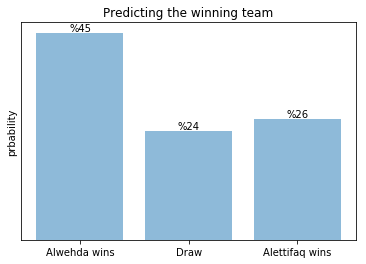

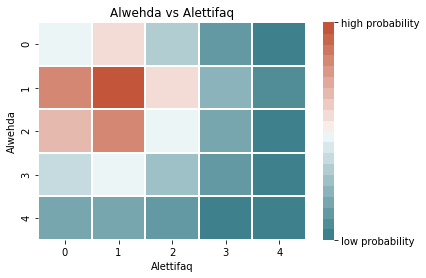

In [15]:
simulate_match(poisson_model, 'Alwehda', 'Alettifaq', max_goals=4)